# 5. Đồ thị địa lý 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\AM\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


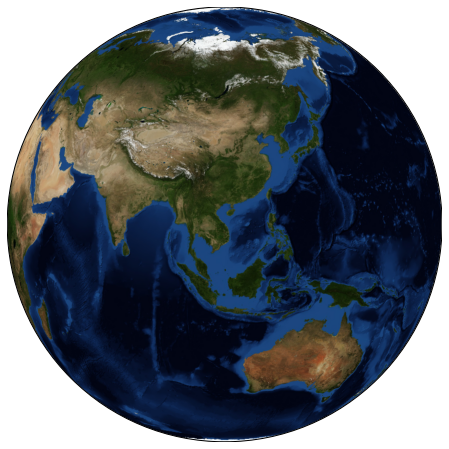

In [3]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=16, lon_0=108)
m.bluemarble(scale=0.5);

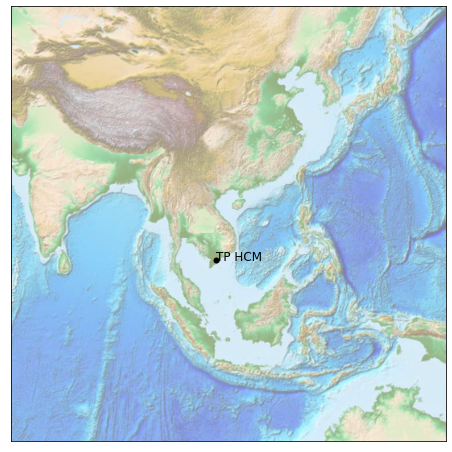

In [4]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6,
            lat_0=16, lon_0=108,)

m.etopo(scale=0.5, alpha=0.5)
# Map (long, lat) to (x, y) for plotting

x, y = m(106,10)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'TP HCM', fontsize=12);

**Trải phẳng quả địa cầu**

In [7]:
import numpy as np
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

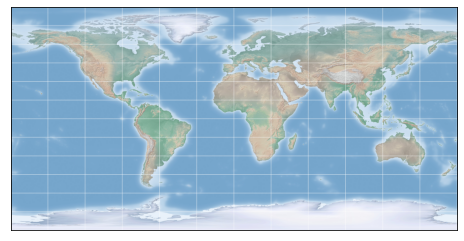

In [8]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

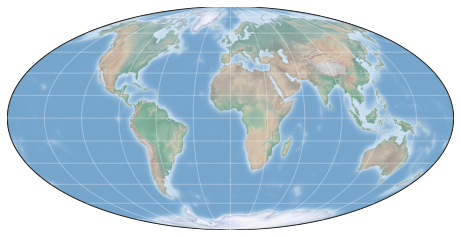

In [9]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

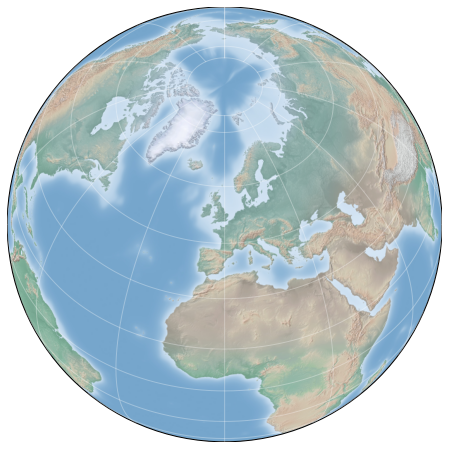

In [10]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

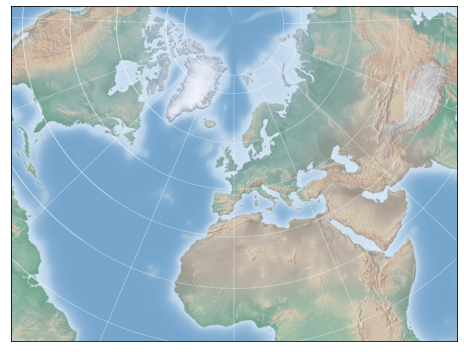

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,width=1.6E7, height=1.2E7)
draw_map(m)

# 6. Tạo chuyển động bằng nhiều ảnh tĩnh

In [12]:
import matplotlib.animation as animation

x = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-") # start with an empty plot
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0, 0], [-0.5, 0.5], "b-", 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

# this function will be called at every iteration
def update_line(num, data, line):
    line.set_data(data[..., :num] + np.random.rand(2, num) / 25)  # we only plot the first `num` data points.
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)
plt.close() # call close() to avoid displaying the static plot

In [13]:
from IPython.display import HTML
HTML(line_ani.to_jshtml())

In [14]:
import matplotlib
matplotlib.rc('animation', html='jshtml')

In [15]:
animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)